# Extrator de PDF - Experimento

Extração de texto, figuras, e renderização em arquivos PDF. Utiliza a biblioteca [PyMuPDF](https://pymupdf.readthedocs.io/en/latest/intro.html), e consegue extrair partes ou seções selecionadas do texto e de páginas.

## Declaração de parâmetros e hiperparâmetros

Declare parâmetros com o botão  na barra de ferramentas.<br>
A variável `dataset` possui o caminho para leitura do arquivos importados na tarefa de "Upload de dados".<br>
Você também pode importar arquivos com o botão  na barra de ferramentas.

Para esse componente, a base de dados deve estar nos seguinte formatos possíveis:

I)
- Arquivo CSV chamado dataset.csv contendo as colunas "**file_path**" e "**subset**", entre outras, caso necessário. Onde:
    
    - file_path: caminho para o arquivo, em formato PDF.
    
    - subset: conjunto ao qual a amostra faz parte, pode ser "**train**", "**test**", e "**val**" .
    
- Arquivos .pdf
    
- Cada conjunto de treino, validação e teste possuem sua pasta com suas respectivas imagens. Um exemplo da árvore de diretórios pode ser observado abaixo:

```bash
     dataset
     |________dataset.csv
     |________train
     |        |__________pdf_name0.pdf 
     |        |__________pdf_name1.pdf 
     |        |__________pdf_name2.pdf 
     |        |__________pdf_name3.pdf 
     |               ...
     |
     |________val
     |        |__________pdf_name4.pdf
     |        |__________pdf_name5.pdf
     |        |__________pdf_name6.pdf
     |        |__________pdf_name7.pdf
     |               ...
     |
     |________test
     |        |__________pdf_name8.pdf
     |        |__________pdf_name9.pdf
     |        |__________pdf_name10.pdf
     |        |__________pdf_name11.pdf
     |              ...
```

II)
- Arquivos .pdf na pasta raíz
```bash
     dataset
     |________pdf_name0.pdf 
     |________pdf_name1.pdf 
     |________pdf_name2.pdf 
     |________pdf_name3.pdf 
     |________pdf_name4.pdf
     |________pdf_name5.pdf
     |________pdf_name6.pdf
     |________pdf_name7.pdf
     |               ...
```


In [45]:
dataset = "/tmp/data/data2-4.zip" #@param {type:"string"}
extract = "text" #@param ["text", "figures", "prints"] {type:"string", label:"Opções de extração", description:"Três possíveis extrações do PDF. Modo texto irá extrair apenas os textos do pdf em formato .csv, modo figuras irá extrair apenas as figuras dentro do arquivo PDF, e modo prints irá extrair todo o PDF em formato de imagem."}
text_filter_begin = "" #@param {type: "string", label:"Separador Inicial", description:"String que define o inicio do corte no texto, caso o text_filter seja \"separator\"."}
text_filter_end = "" #@param {type: "string", label:"Separador final", description:"String que define o final do corte no texto, caso o text_filter seja \"separator\"."}
initial_page = None #@param {type: "number", label:"Número da primeira página a ser realizada a extração", description:"caso indicado, a extração será feita a partir da página indicada"}
final_page = None #@param {type: "number", label:"Número da última página a ser realizada a extração", description:"caso indicado, a extração será encerrada na indicada."}


In [50]:
# extractor parameters
extractor_parameters = {
    'extract':extract,
    'text_filter_begin':text_filter_begin,
    'text_filter_end':text_filter_end,
    'initial_page': initial_page,
    'final_page': final_page
}

if initial_page != None: initial_page -= 1;
if final_page != None: final_page -= 1;

## Leitura do conjunto de dados

O exemplo abaixo faz a leitura de dados em PDF.<br>
Modifique o código de acordo com o tipo de dado que desejar ler.

In [2]:
# Construct dataset folder name for unzipped files
folder = '.'.join(dataset.split('.')[:-1])

# Creating empty folder
!mkdir -p {folder}

# Extracting files
!unzip -o {dataset} -d {folder}

Archive:  /tmp/data/data2-4.zip
  inflating: /tmp/data/data2-4/data2/2109.09355.pdf  
  inflating: /tmp/data/data2-4/data2/2109.09906.pdf  
  inflating: /tmp/data/data2-4/data2/2109.10181.pdf  
  inflating: /tmp/data/data2-4/data2/TCEVITORYESO.pdf  


## Extraindo texto


extracting TCEVITORYESO.pdf...OK
extracting 2109.09355.pdf...OK
extracting 2109.09906.pdf...OK
extracting 2109.10181.pdf...OK


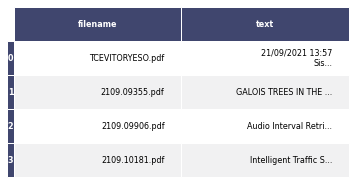

In [46]:
import os
from pdf_extractor import read_dir
import matplotlib.pyplot as plt
from platiagro.plotting import plot_data_table


if extract == "text":
    for filename in os.listdir(folder):
        if os.path.isdir(folder + "/" + filename):
            df = read_dir(folder + "/" + filename + "/",
                          extract = extract,
                          text_filter_begin = text_filter_begin,
                          text_filter_end = text_filter_end,
                          initial_page = initial_page,
                          final_page = final_page)
            
    ax = plot_data_table(df)
    plt.show()

## Extraindo as figuras


extracting TCEVITORYESO.pdf...OK
extracting 2109.09355.pdf...OK
extracting 2109.09906.pdf...OK
extracting 2109.10181.pdf...OK
4 figuras extraidas.


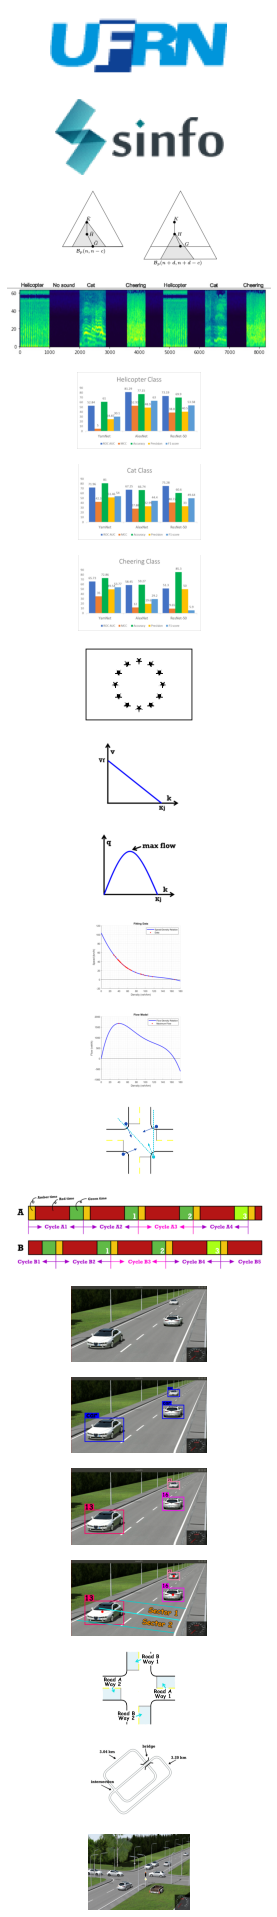

In [52]:
import matplotlib.pyplot as plt
from PIL import Image

if extract == "figures":
    for filename in os.listdir(folder):
        if os.path.isdir(folder + "/" + filename):
            all_figures = read_dir(folder + "/" + filename + "/",
                          extract = extract,
                          text_filter_begin = text_filter_begin,
                          text_filter_end = text_filter_end,
                          initial_page = initial_page,
                          final_page = final_page)
            print(f"{len(all_figures)} figuras extraidas.")

    flatted_figures = []
    for figure in all_figures:
        flatted_figures += figure

    fig, axies = plt.subplots(len(flatted_figures), figsize=(35, 35))

    for jdx, img in enumerate(flatted_figures):
        axies[jdx].imshow(img)
        axies[jdx].axis('off')

## Extraindo o PDF como prints


In [ ]:
if extract == "prints":
    for filename in os.listdir(folder):
        if os.path.isdir(folder + "/" + filename):
            all_pages = read_dir(folder + "/" + filename + "/",
                          extract = extract,
                          text_filter_begin = text_filter_begin,
                          text_filter_end = text_filter_end,
                          initial_page = initial_page,
                          final_page = final_page)
            print(f"{len(all_pages)} paginas extraidas.")

    flatted_pages = []
    for page in all_pages:
        flatted_pages += page

    fig, axies = plt.subplots(len(flatted_pages), figsize=(545, 545))

    for jdx, img in enumerate(flatted_pages):
        axies[jdx].imshow(img)
        axies[jdx].axis('off')

## Salva resultados da tarefa

A plataforma guarda o conteúdo de `/tmp/data/` para as tarefas subsequentes.<br>
Use essa pasta para salvar modelos, metadados e outros resultados.

In [53]:
from joblib import dump

artifacts = {
    "extractor_parameters": extractor_parameters
}

if extract == "text":
    df.to_csv("/tmp/data/results.csv", index=False)

elif extract == "figures":
    for idx, figures in enumerate(all_figures):
        for jdx, img in enumerate(figures):
            img.save("/tmp/data/" + f"doc{idx+1}_fig{jdx+1}.png")
            
elif extract == "prints":
    for idx, pages in enumerate(all_pages):
        for jdx, page in enumerate(pages):
            page.save("/tmp/data/" + f"doc{idx+1}_page{jdx+1}.png")
    
    
dump(artifacts, "/tmp/data/pdf_extractor.joblib")

['/tmp/data/pdf_extractor.joblib']